In [197]:
import astropy.io.fits as fits
import numpy as np
import glob
from matplotlib import pyplot as plt
from astropy.io import ascii
from astroquery.mast import Observations
from astropy.table import Table
from astropy import units as u
from astropy import constants as const

# program ID GO-10775.
# 

## Part	1:	Globular	Cluster	MS	Fitting	and	Distance	Determination

1.	Enter	the	HLA	web	site	at	http://hla.stsci.edu

2.	Perform	an	advanced	search	for	observations	with	the	Wide	Field	Planetary	Camera	2	
(WFPC2)	taken	as	part	of	program	ID	GO-10775.	You	only	need	to	enter	the	program	
number	in	the	web	form.

3.	Click	on	the	“Inventory”	tab	so	you	can	see	a	list	of	all	of	the	observations.	You	will	see	
entries	for	the	following	Milky	Way	globular	clusters:		NGC	104,	NGC	362,	NGC	3201,	NGC	
4833,	NGC	5139,	NGC	6121,	NGC	6218,	NGC	6254,	NGC	6362,	NGC	6397,	NGC	6656,	NGC	
6752,	NGC	6809,	and	NGC	6838.

4.	Download	the	photometry	available	from	the	“PlotCat”	link	for	clusters	with	“F606W/
F814W”	in	the	“Spectral_Element”	column.

In [12]:
Observations.get_product_list_async('10775')

[<Response [200]>]

In [11]:
obs_tabl = Observations.query_criteria(obs_collection='HLA', instrument='WFPC2', proposal_id='10775', filters='F814W;F606W', calib_level=4)
obs_tabl

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
str1,int64,str1,str1,str1,float64,float64,float64,float64,float64,str1,str1,float64,float64,str1,str1,float64,str1,str1,str1,str1,str1,int64,str1,str1,str1,str1,str1,bool,float64,str1,str1,str1


In [13]:
data_names = glob.glob('/mnt/c/Users/panda/Documents/Stars/photometry_data/hst*')

In [14]:
#  Object      Pixel Position      ICRS Coordinates        f606w    f814w    f606w    f814w
#      ID       X          Y       RA          DEC     | MagAP2----------| TotMag----------| CI--------------| Flags-----------
column_names = ['Object ID', 'X', 'Y', 'RA', 'DEC', 'f606w_MagAP2', 'f814w_MagAP2', 
                'f606w_TotMag', 'f814w_TotMag', 'f606w_CI', 'f814w_CI', 'f606w_flags', 'f814w_flags']

In [20]:
Table(data=ascii.read(data_names[0]), names=column_names)

Object ID,X,Y,RA,DEC,f606w_MagAP2,f814w_MagAP2,f606w_TotMag,f814w_TotMag,f606w_CI,f814w_CI,f606w_flags,f814w_flags
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
1,508.036,108.712,140.7249201,-77.3427749,23.19,22.076,23.02,21.892,0.924,0.887,0,0
5,539.726,188.527,140.7208927,-77.3405587,23.132,22.71,22.962,22.526,0.928,1.11,0,0
7,733.829,214.711,140.6962884,-77.3398356,18.237,17.77,18.067,17.586,0.84,0.895,16,0
11,418.331,253.062,140.7362691,-77.3387623,20.705,19.588,20.535,19.404,0.833,0.852,16,0
12,977.376,260.96,140.6654205,-77.338553,22.187,21.842,22.017,21.658,0.862,0.969,0,0
14,1020.88,270.142,140.6599073,-77.338298,18.801,17.726,18.631,17.542,0.932,0.946,0,0
16,408.265,276.471,140.737541,-77.3381117,18.643,18.067,18.473,17.883,0.778,0.855,16,0
20,962.768,345.466,140.6672709,-77.3362056,22.826,22.443,22.656,22.259,0.895,0.754,0,16
21,679.352,359.407,140.7031802,-77.3358153,23.676,22.759,23.676,22.575,1.3,1.007,1,0


5.	For	each	cluster,	plot	a	color-magnitude	diagram	(CMD)	with	(f606w_TOTMAG)	–	
(f814w_TOTMAG)	on	the	abscissa	and	f606w_TOTMAG	on	the	ordinate.	Make	sure	to	plot	
the	vertical	axis	flipped	with	brighter	magnitudes	at	the	top	of	the	axis.	Scale	the	CMD	so	
that	you	focus	on	the	main	sequence	and	that	you	use	the	same	relative	range	of	color	and	
magnitude	for	all	of	the	clusters.

In [183]:
def plot_colormag(tbl, show=True):
    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
    ordinate = tbl['f606w_TotMag']
    #print(tbl.meta['comments'][12])
    #plt.title(tbl.meta['comments'][12].split(':')[1])
    plt.gca().invert_yaxis()
    plt.scatter(abscissa, ordinate, label=tbl.meta['comments'][12].split(':')[1])
    plt.xlabel('Color')
    plt.ylabel('Magnitude')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(left=0.01, right=10**2)
    plt.legend()
    if show:
        plt.show()

In [184]:
tbl = Table(data=ascii.read(data_names[1]), names=column_names)

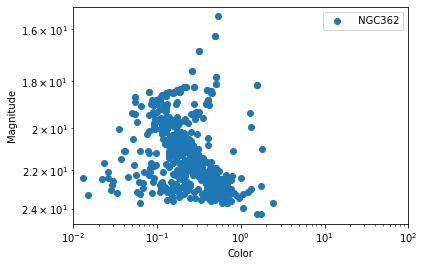

In [185]:
plot_colormag(tbl)

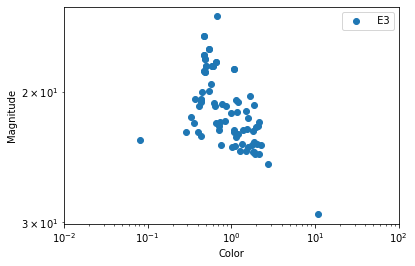

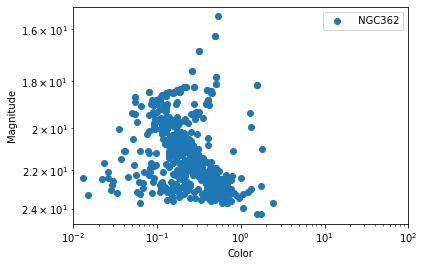

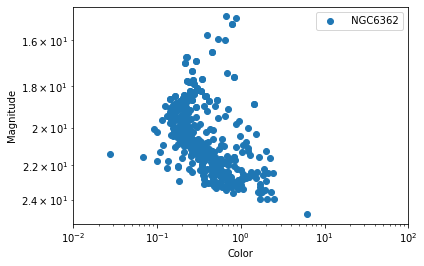

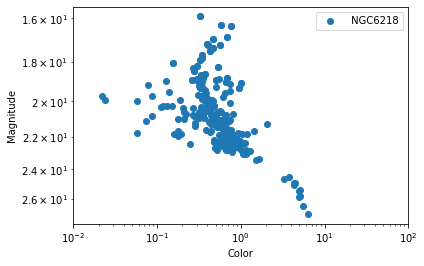

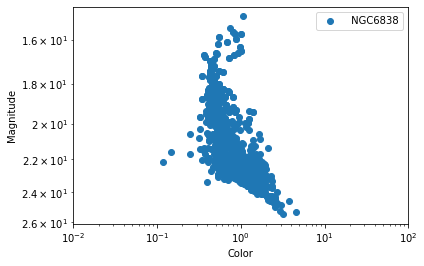

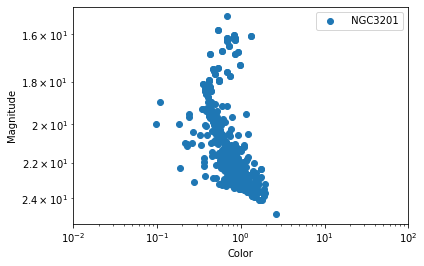

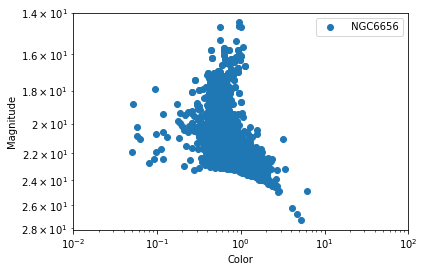

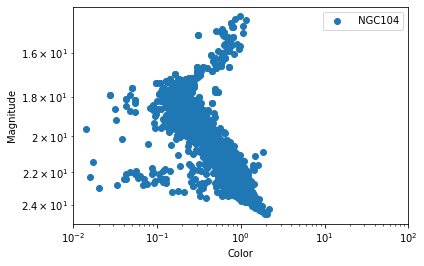

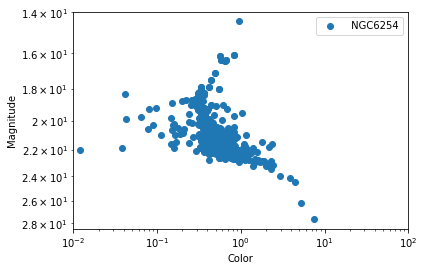

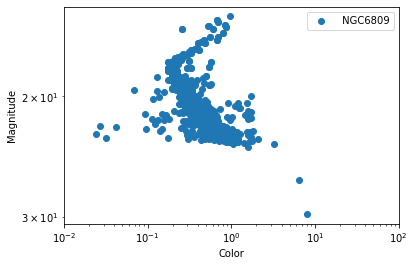

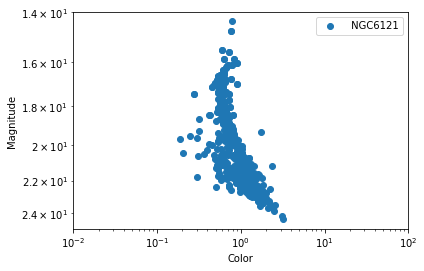

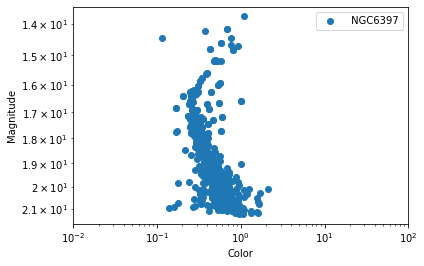

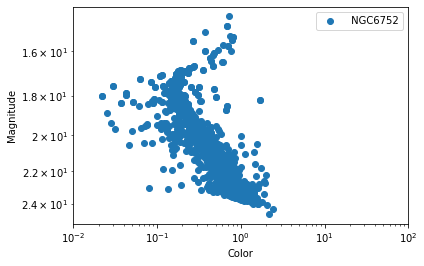

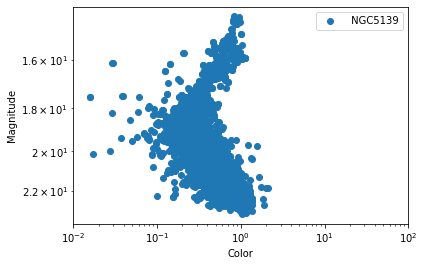

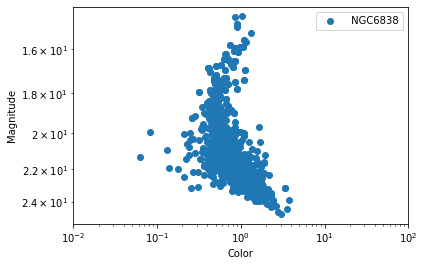

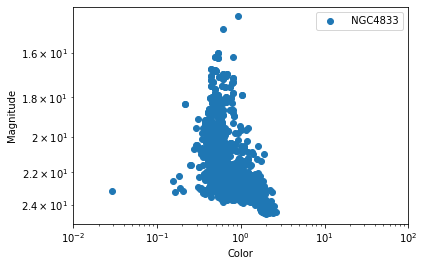

In [186]:
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    #print(len(tbl))
    plot_colormag(tbl)

6.	Select	one	of	the	clusters	as	your	standard	reference	cluster	–	choose	the	one	that	has	the	
best	determined	and	populated	main	sequence.

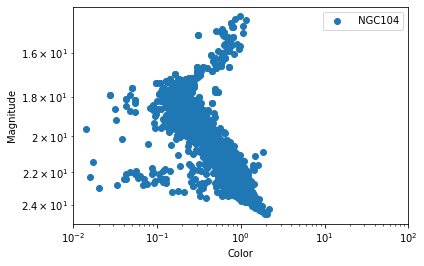

In [198]:
# NGC104
tbl_ref = Table(data=ascii.read(data_names[7]), names=column_names)
plot_colormag(tbl_ref)
dist_ref = 4.45*u.kpc

7.	Assume	all	of	the	clusters	have	the	same	metallicity	and	reddening	and	determine	the	
(vertical)	magnitude	shift	required	to	match	the	lower	(unevolved)	main	sequences	of	all	of	
the	other	clusters	to	that	of	the	reference	cluster.	Do	this	as	quantitatively	as	you	can.	This	
represents	an	approximate	distance	modulus	difference	between	these	clusters	in	the	
F606W	filter	pass	band,	which	is	close	to	the	ground-based	Johnson	V	band.	Determine	an	
error	value	for	each	distance	modulus	difference	using	a	method	that	is	as	quantitative	as	
possible.	If	you	are	not	able	to	measure	a	distance	modulus	difference	for	a	given	cluster,	
please	comment	on	the	reason(s)	for	this.

The lower main sequence stars will have the highest magnitudes, as less luminous stars have higher magnitudes, and brighter stars have lower magnitudes.

In [205]:
def magshift(tbl, tbl_ref, dist_ref):
    mag = tbl['f606w_TotMag']
    mag_ref = tbl_ref['f606w_TotMag']
    mag_min = np.max(mag)
    mag_min_ref = np.max(mag_ref)
    shift = mag_min_ref - mag_min
    print(tbl.meta['comments'][12].split(':')[1])
    print(mag_min, mag_min_ref, shift, dist_modulus(mag_min_ref, mag_min, dist_ref))
    
def dist_modulus(mA, mB, dA):
    # mB - mA = 5 log10 (dB / dA)
    # (mB - mA) / 5 = log10 (dB / dA)
    # 10^((mB - mA) / 5) = dB / dA
    dB = dA * 10**((mB - mA) / 5)

In [206]:
tbl = Table(data=ascii.read(data_names[0]), names=column_names)
magshift(tbl, tbl_ref, dist_ref)

 E3
29.276 24.615 -4.661000000000001 None


In [195]:
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    magshift(tbl, tbl_ref)

 E3
29.276 24.615 -4.661000000000001 24.615
 NGC362
24.288 24.615 0.3269999999999982 24.615
 NGC6362
24.909 24.615 -0.2940000000000005 24.615
 NGC6218
27.086 24.615 -2.471 24.615
 NGC6838
25.455 24.615 -0.8399999999999999 24.615
 NGC3201
24.968 24.615 -0.35300000000000153 24.615
 NGC6656
27.26 24.615 -2.645000000000003 24.615
 NGC104
24.615 24.615 0.0 24.615
 NGC6254
27.625 24.615 -3.0100000000000016 24.615
 NGC6809
29.747 24.615 -5.1320000000000014 24.615
 NGC6121
24.392 24.615 0.22299999999999898 24.615
 NGC6397
21.246 24.615 3.3689999999999998 24.615
 NGC6752
24.664 24.615 -0.04900000000000304 24.615
 NGC5139
23.301 24.615 1.314 24.615
 NGC6838
24.799 24.615 -0.18400000000000105 24.615
 NGC4833
24.598 24.615 0.01699999999999946 24.615


8.	Go	to	the	following	web	site	and	look-up	the	apparent	distance	modulus	of	your	standard	
reference	cluster	in	the	V-band.	http://physwww.mcmaster.ca/%7Eharris/mwgc.dat

9.	Use	this	apparent	distance	modulus	to	compute	the	distance	moduli	of	all	of	the	other	
clusters	in	your	dataset	using	the	offsets	determined	in	point	7	above.

10.	Compare	your	apparent	distance	moduli	for	each	cluster	with	those	available	at	http://
physwww.mcmaster.ca/%7Eharris/mwgc.dat.	Make	a	plot	illustrating	this	comparison.	
Calculate	statistics	of	your	choice	to	provide	a	quantitative	comparison	of	the	distance	
moduli.	Comment	on	how	well	you	did	in	your	distance	determinations.	

11.	Does	the	difference	between	your	distance	moduli	and	the	actual	values	correlate	with	
some	other	cluster	parameter	such	as	metallicity	or	reddening?	Plot	your	distance	moduli	
differences	against	the	reddening	for	each	cluster.	What	kind	of	overall	behavior	do	you	
see?	How	do	you	interpret	this	behavior?